я начал путатся и перестал понимать давай с начала начнем 


я непонял как линейная 100 выбила гдето ошибка
тут натыкано посмотреть что да как 3 раз :)

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

,dt,Цена на арматуру
0,2022-09-05,46000
1,2022-09-12,46000
2,2022-09-19,46000
3,2022-09-26,45500
4,2022-10-03,45500
5,2022-10-10,45000
6,2022-10-17,44000
7,2022-10-24,43000
8,2022-10-31,42000
9,2022-11-07,41500


In [593]:
print(train.info())
print("="*70)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                28 non-null     datetime64[ns]
 1   Цена на арматуру  28 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 580.0 bytes
None


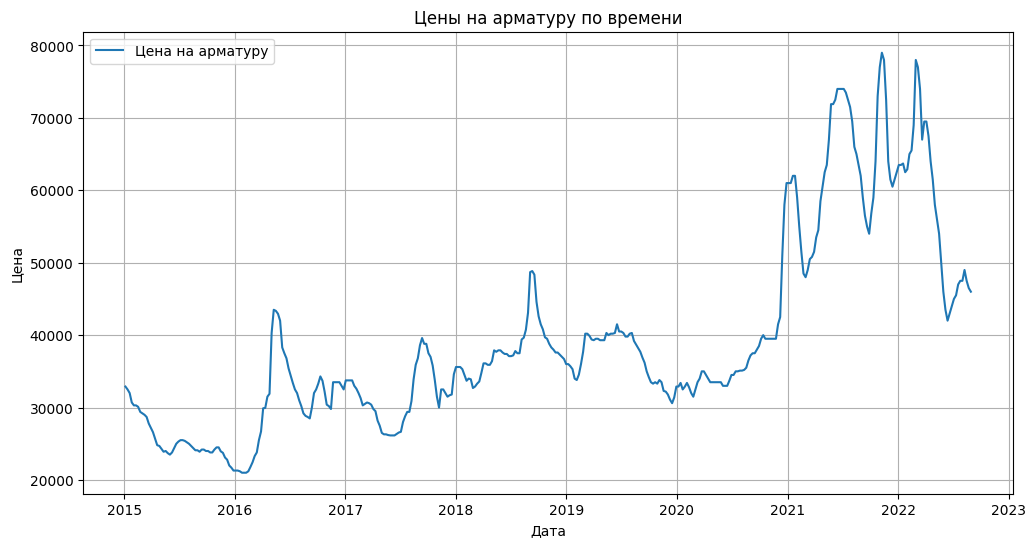

In [594]:

plt.figure(figsize=(12, 6))
plt.plot(train['dt'], train['Цена на арматуру'], label='Цена на арматуру')
plt.title('Цены на арматуру по времени')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()

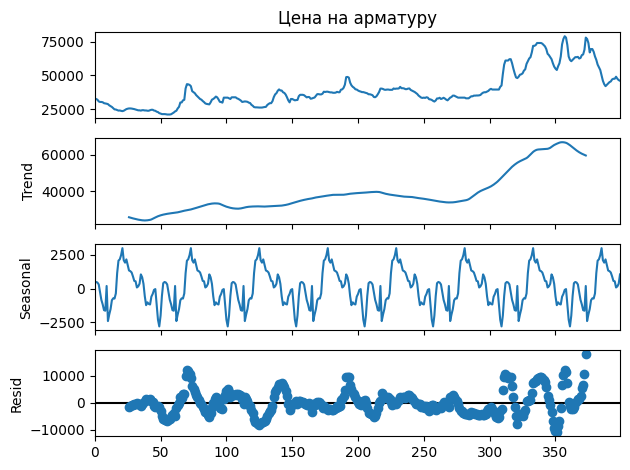

In [595]:
result = seasonal_decompose(train['Цена на арматуру'], model='additive', period=52)
result.plot()
plt.show()

In [596]:
train.head(5)

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300


In [597]:
print(train.isnull().sum())
print("="*70)
print(test.isnull().sum())

dt                  0
Цена на арматуру    0
dtype: int64
dt                  0
Цена на арматуру    0
dtype: int64


In [598]:

train['month'] = train['dt'].dt.month
test['month'] = test['dt'].dt.month

train['week_of_year'] = train['dt'].dt.isocalendar().week
test['week_of_year'] = test['dt'].dt.isocalendar().week

print(train[['dt', 'month', 'week_of_year']].head())

          dt  month  week_of_year
0 2015-01-05      1             2
1 2015-01-12      1             3
2 2015-01-19      1             4
3 2015-01-26      1             5
4 2015-02-02      2             6


In [599]:
train['rolling_mean_4'] = train['Цена на арматуру'].rolling(window=4).mean()
test['rolling_mean_4'] = test['Цена на арматуру'].rolling(window=4).mean()

In [600]:
train['lag_1'] = train['Цена на арматуру'].shift(1)
train['lag_2'] = train['Цена на арматуру'].shift(2)
train['lag_3'] = train['Цена на арматуру'].shift(3)

test['lag_1'] = test['Цена на арматуру'].shift(1)
test['lag_2'] = test['Цена на арматуру'].shift(2)
test['lag_3'] = test['Цена на арматуру'].shift(3)

print(train[['dt', 'Цена на арматуру', 'lag_1', 'lag_2', 'lag_3']].head())

          dt  Цена на арматуру    lag_1    lag_2    lag_3
0 2015-01-05             32900      NaN      NaN      NaN
1 2015-01-12             32500  32900.0      NaN      NaN
2 2015-01-19             32000  32500.0  32900.0      NaN
3 2015-01-26             30700  32000.0  32500.0  32900.0
4 2015-02-02             30300  30700.0  32000.0  32500.0


In [601]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [602]:
X_train = train[['lag_1', 'lag_2', 'lag_3', 'month', 'week_of_year', 'rolling_mean_4']]
y_train = train['Цена на арматуру']

X_test = test[['lag_1', 'lag_2', 'lag_3', 'month', 'week_of_year', 'rolling_mean_4']]
y_test = test['Цена на арматуру']


In [603]:
model = CatBoostRegressor(verbose=100)
model.fit(X_train, y_train)

Learning rate set to 0.035382
0:	learn: 13059.7592108	total: 789us	remaining: 789ms
100:	learn: 2039.2816660	total: 69.7ms	remaining: 621ms
200:	learn: 1379.3593221	total: 140ms	remaining: 555ms
300:	learn: 1096.8995351	total: 209ms	remaining: 486ms
400:	learn: 859.2903880	total: 278ms	remaining: 416ms
500:	learn: 699.1198358	total: 352ms	remaining: 350ms
600:	learn: 599.3013586	total: 428ms	remaining: 284ms
700:	learn: 520.0326252	total: 499ms	remaining: 213ms
800:	learn: 458.5808485	total: 568ms	remaining: 141ms
900:	learn: 408.8354726	total: 637ms	remaining: 70ms
999:	learn: 368.3152693	total: 710ms	remaining: 0us


In [604]:
predictions = model.predict(X_test)
test['predicted_price'] = predictions

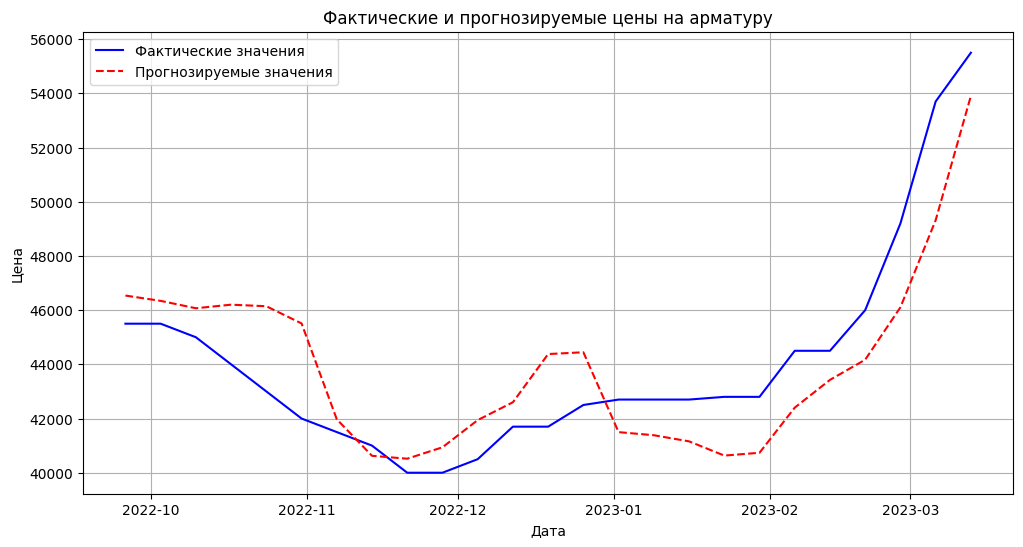

In [605]:
plt.figure(figsize=(12, 6))
plt.plot(test['dt'], test['Цена на арматуру'], label='Фактические значения', color='blue')
plt.plot(test['dt'], test['predicted_price'], label='Прогнозируемые значения', color='red', linestyle='--')
plt.title('Фактические и прогнозируемые цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()

In [606]:
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Метрики для модели {model_name}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    print("-" * 30)

    

In [607]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
calculate_metrics(y_test, lr_predictions, "Линейная регрессия")

Метрики для модели Линейная регрессия:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R²: 1.00
------------------------------


In [608]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
calculate_metrics(y_test, rf_predictions, "Random Forest")

Метрики для модели Random Forest:
MAE: 1206.82
MSE: 2923161.23
RMSE: 1709.73
R²: 0.79
------------------------------


In [609]:
cb_model = CatBoostRegressor(verbose=100)
cb_model.fit(X_train, y_train)
cb_predictions = cb_model.predict(X_test)
calculate_metrics(y_test, cb_predictions, "CatBoost")

Learning rate set to 0.035382
0:	learn: 13059.7592108	total: 799us	remaining: 799ms
100:	learn: 2039.2816660	total: 76.8ms	remaining: 684ms
200:	learn: 1379.3593221	total: 149ms	remaining: 591ms
300:	learn: 1096.8995351	total: 220ms	remaining: 510ms
400:	learn: 859.2903880	total: 296ms	remaining: 442ms
500:	learn: 699.1198358	total: 383ms	remaining: 382ms
600:	learn: 599.3013586	total: 459ms	remaining: 305ms
700:	learn: 520.0326252	total: 534ms	remaining: 228ms
800:	learn: 458.5808485	total: 609ms	remaining: 151ms
900:	learn: 408.8354726	total: 681ms	remaining: 74.9ms
999:	learn: 368.3152693	total: 755ms	remaining: 0us
Метрики для модели CatBoost:
MAE: 1737.57
MSE: 4002981.32
RMSE: 2000.75
R²: 0.71
------------------------------


In [610]:
arima_model = ARIMA(train['Цена на арматуру'], order=(5, 1, 0))  # Порядок (p, d, q)
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test))
calculate_metrics(y_test, arima_predictions, "ARIMA")

Метрики для модели ARIMA:
MAE: 3588.06
MSE: 17851936.79
RMSE: 4225.16
R²: -0.28
------------------------------


c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_

In [611]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense


# X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

# # Создание модели
# model_lstm = Sequential()
# model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
# model_lstm.add(Dense(1))
# model_lstm.compile(optimizer='adam', loss='mse')

# # Обучение модели
# model_lstm.fit(X_train_lstm, y_train, epochs=27, verbose=1)

In [612]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

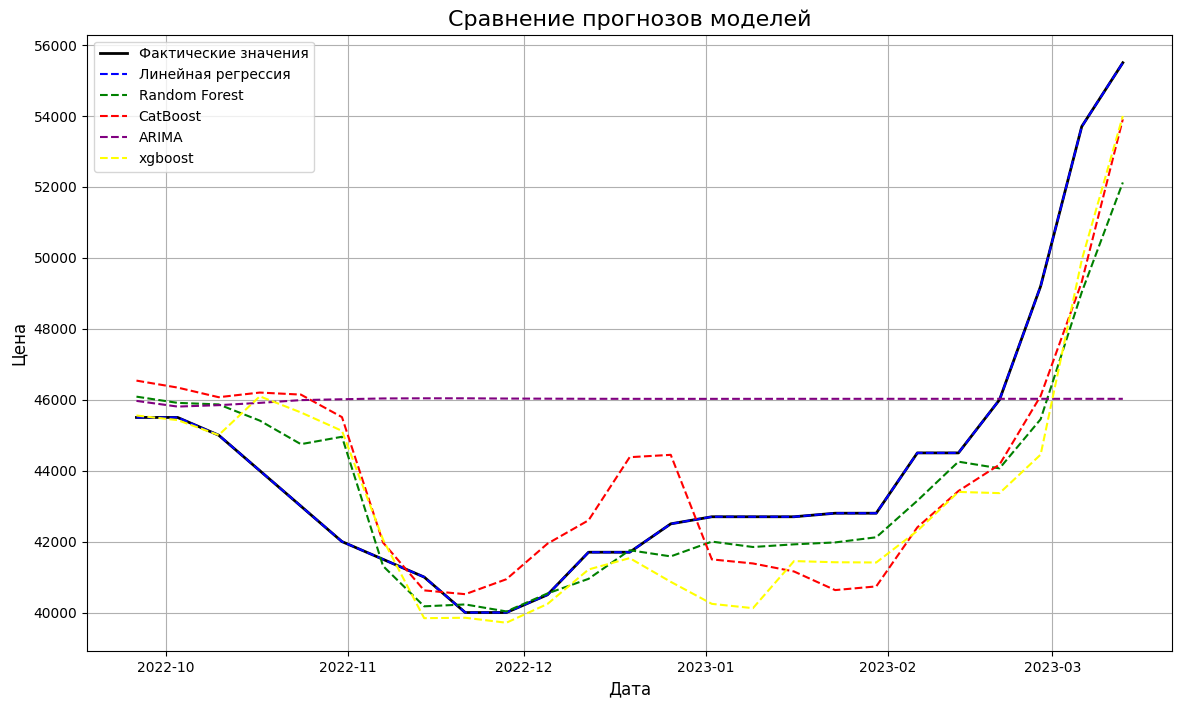

In [613]:

plt.figure(figsize=(14, 8))


plt.plot(test['dt'], y_test, label='Фактические значения', color='black', linewidth=2)

# Прогнозы моделей
plt.plot(test['dt'], lr_predictions, label='Линейная регрессия', linestyle='--', color='blue')
plt.plot(test['dt'], rf_predictions, label='Random Forest', linestyle='--', color='green')
plt.plot(test['dt'], cb_predictions, label='CatBoost', linestyle='--', color='red')
plt.plot(test['dt'], arima_predictions, label='ARIMA', linestyle='--', color='purple')
plt.plot(test['dt'], xgb_predictions, label='xgboost', linestyle='--', color='yellow')

# Настройки графика
plt.title('Сравнение прогнозов моделей', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()